# Лабораторная работа №3


# Кластеризация

Кластеризация — это задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Задача кластеризации относится к классу задач машинного обучения без учителя (unsupervised learning).

Часто кластеризация выступает первым шагом при анализе данных. После выделения схожих групп к ним применяются другие методы машинного обучения, для каждой группы строится отдельная модель. 

Большинство алгоритмов кластеризации предполагают сравнение объектов между собой на основе некоторой меры близости (сходства). Мера близости убывает (иногда возрастает) с увеличением близости объектов.

Импортируем необходимые для работы библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

## Генерация наборов данных

Бибиотека scikit-learn включает в себя различные генераторы случайных данных, которые можно использовать для создания синтетических наборов данных контролируемого размера и сложности.

Функция `make_blobs()` создает наборы данных с гаусовым распределением относительно заданных центров (опускаем метки классов для созданных точек):

In [2]:
from sklearn.datasets import make_blobs
centers3 = [[2, 2], [-2, -2], [2, -2]]
X, _ = make_blobs(n_samples=300, centers=centers3, cluster_std=0.7, random_state=0)
X.shape

(300, 2)

Для визуализации построенного набора данных используем следующий программный код:

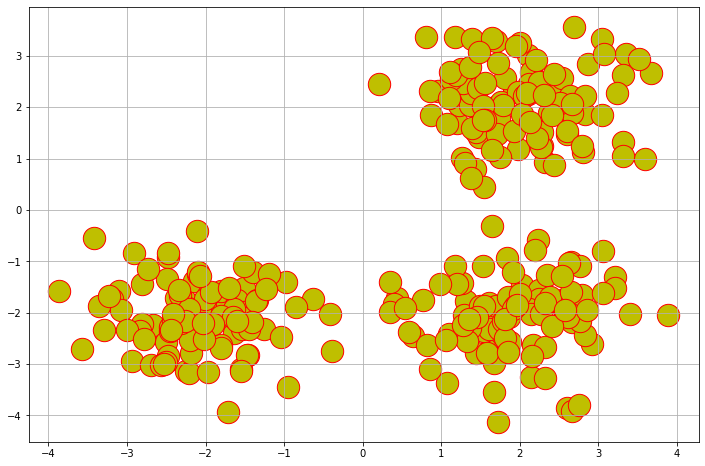

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],edgecolors='r',c='y',s=500)
plt.grid(True)

Функция `make_classification()` создает случайную задачу классификации, а именно, вокруг вершин многомерного гиперкуба создаются нормально распределенные группы точек, при этом вводится зависимость между случайными величинами и к данным добавляется дополнительный шум:

In [4]:
from sklearn.datasets import make_classification

X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)
X.shape

(1000, 2)

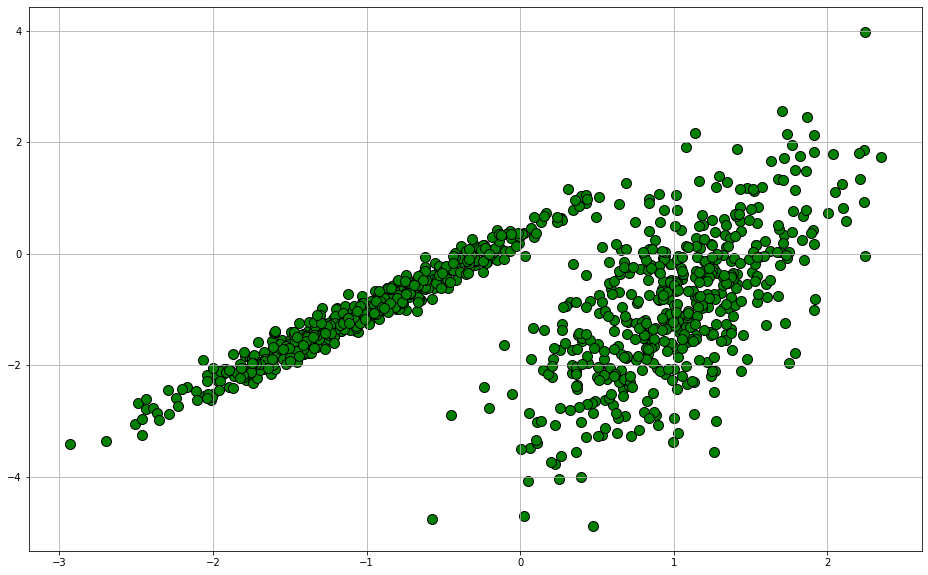

In [5]:
plt.figure(figsize=(16,10))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='g',s=100)
plt.grid(True)

При помощи функции `make_circles()` могут быть созданы случайные наборы данных в виде концентрических окружностей:

In [6]:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=1000, factor=.5, noise=.05)
X.shape

(1000, 2)

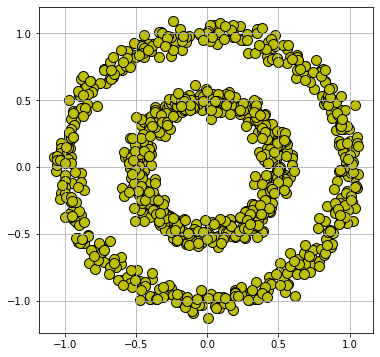

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='y',s=100)
plt.grid(True)

При помощи функции `make_moons()` могут быть созданы случайные наборы данных в виде двух разделенных полуокружностей:

In [8]:
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=500, noise=.05)
X.shape

(500, 2)

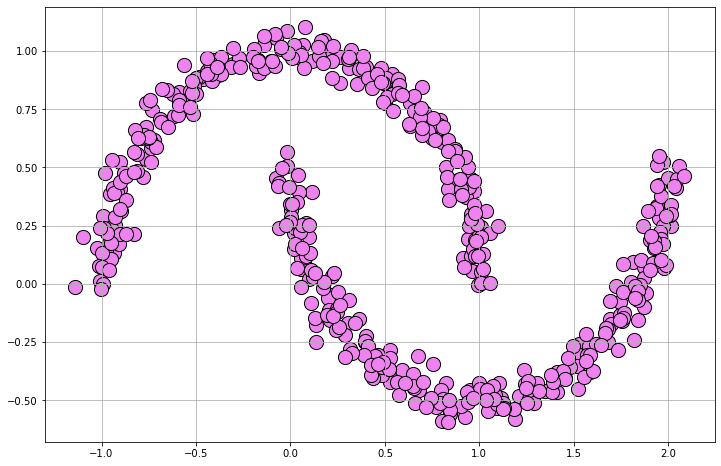

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='violet',s=200)
plt.grid(True)

## Тестовый набор данных и его визуализация

Будем использовать для визуализации следующую функцию:

In [10]:
def plot_cluster(X,y):
    # визуализация кластеров 
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        # индексы строк для данного кластера 
        row_ix = np.where(y == cluster)
        # диаграмма рассеяния для кластера
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100)
    plt.grid(True)

Будем выполнять кластеризацию для следующего набора данных:

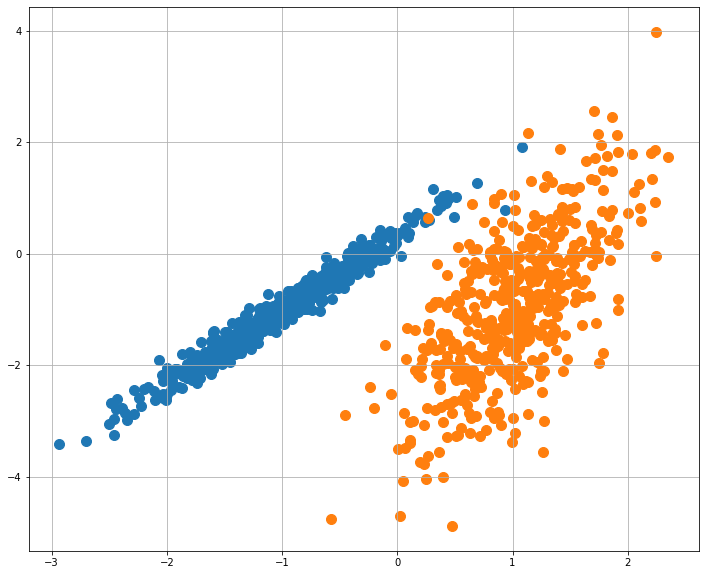

In [11]:
# синтетический набор данных
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)

plot_cluster(X,y)

In [ ]:
X.shape, y.shape

## Алгоритм K-means

Алгоритм K-средних (K-means) является наиболее известным алгоритмом кластеризации и базируется на идее  минимизации дисперсии в каждом кластере (минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров).

Основным параметром конфигурации является параметр `n_clusters`, равный оценочному количеству кластеров в данных.

In [ ]:
# кластеризация k-means 
from sklearn.cluster import KMeans

In [ ]:
# модель
model = KMeans(n_clusters=2)

In [ ]:
# тренируем модель
model.fit(X)

In [ ]:
# присваиваем метку каждой точке набора
yhat = model.predict(X)

plot_cluster(X,yhat)

Для рассматриваемого набора данных получено разбиение на два кластера, однако разная дисперсия первоначальных классов приводит к не самому лучшему результату.

У класса KMeans имеются следующие свойства:

* `cluster_centers_` – массив центров кластеров  
* `labels_` – метки для каждой точки
* `inertia_` – сумма квадратов расстояний от точек до ближайших центров кластеров
* `n_iter_` – количество итераций алгоритма

In [ ]:
model.n_iter_

Можно добавить на визуализацию кластеризации набора данных центры кластеров: 

In [ ]:
plot_cluster(X,yhat)
centers = model.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="D",
    s=500,
    color="k",
);

Можно выполнить визуализацию областей принятия решений о кластеризации точек данных:

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.figure(1)
#plt.clf()
plt.figure(figsize=(16,12))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X[:, 0], X[:, 1], "yo", markersize=5)
# Plot the centroids as a white X
centers = model.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="x",
    s=1000,
    lw=5,
    color="r",
)
plt.title("Визуализация областей принятия решений при кластеризации методом K-means")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Алгоритм mini-batch K-Means

Алгоритм mini-batch K-Means - это модифицированная версия алгоритма k-средних, которая обновляет центроиды кластеров, используя мини выборки из набора вместо всего набора данных, что может ускорить работу с большими наборами данных и, возможно, обеспечить более высокую устойчивость к статистическому шуму  в данных.

In [ ]:
# кластеризация mini-batch k-means
from sklearn.cluster import MiniBatchKMeans

# модель
model = MiniBatchKMeans(n_clusters=2)

# тренируем модель
model.fit(X)

# присваиваем метку каждой точке набора
yhat = model.predict(X)

plot_cluster(X,yhat)

Результат кластеризации аналогичен результату применения алгоритма K-Means.

## Алгоритм Mean Shift

В алгоритме Mean Shift (сдвиг среднего значения) центроиды кластеров выбираются в областях с наибольшей плотностью.

In [ ]:
# кластеризация mean shift 
from sklearn.cluster import MeanShift

# модель
model = MeanShift()

# тренируем модель и присваиваем метку каждой точке набора
yhat = model.fit_predict(X)

plot_cluster(X,yhat)

В классе `MeanShift` имеются следующие свойства:

* `cluster_centers_` – массив центров кластеров  
* `labels_` – метки для каждой точки
* `n_iter_` – количество итераций алгоритма

## Иерархическая кластеризация

При иерархической кластеризации создается иерархия вложенных кластеров.

In [ ]:
# иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

# модель иерархической кластеризации, расстояние между кластерами методом Ward
model = AgglomerativeClustering(n_clusters=2)

# тренируем модель и присваиваем метку каждой точке набора
yhat = model.fit_predict(X)

plot_cluster(X,yhat)

В классе AgglomerativeClustering имеются, в частности, следующие свойства:

* `n_cluster_` – количество кластеров, найденных алгоритмом  
* `labels_` – метки для каждой точки

Для иерархической кластеризации имеется полезный способ визуализации в виде дендрограммы:

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,5))
plt.title("Дендрограмма иерархической кластеризации")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Число точек в узле (или индекс точки, если без скобок)");

## Алгоритм BIRCH

Алгоритм BIRCH (balanced iterative reducing and clustering using hierarchies) — это алгоритм иерархической кластеризации для наборов данных большого размера. Преимуществом BIRCH является возможность динамической  кластеризации по мере поступления новых многомерных данных. В большинстве случаев алгоритм BIRCH требует одного прохода по базе данных.

In [ ]:
# кластеризация birch 
from sklearn.cluster import Birch

# модель
model = Birch(threshold=0.01, n_clusters=2)

# тренируем модель
model.fit(X)

# присваиваем метку каждой точке набора
yhat = model.predict(X)

plot_cluster(X,yhat)

В результате применения алгоритма получено качественное разбиение на кластеры.

В классе Birch имеется, в частности, следующее свойство:

* `labels_` – метки для каждой точки

## Алгоритм DBSCAN

В алгоритме DBSCAN (Density-based spatial clustering of applications with noise) применяется пространственная кластеризация для наборов данных с шумами, основанная на плотности. Алгоритм группирует в один кластер точки в области с высокой плотностью точек. Одиноко расположенные точки помечаются как шум.

In [ ]:
# кластеризация dbscan 
from sklearn.cluster import DBSCAN

# модель
model = DBSCAN(eps=0.20, min_samples=5)

# тренируем модель и присваиваем метку каждой точке набора
yhat = model.fit_predict(X)

plot_cluster(X,yhat)

Параметр `eps` представляет собой максимальное расстояние между точками, для которого одна точка будет считаться находящейся в окрестности другой. Параметр `min_samples` означает минимальное количество точек в окрестности заданной точки для того, чтобы она рассматривалась как опорная для алгоритма.

В классе DBSCAN имеется, в частности, следующее свойство:

* `labels_` – метки для каждой точки

Чтобы вывести метки кластеров, количество кластеров, а также долю точек данных, которые кластеризовать не удалось, можно поступить так:

In [ ]:
print("Метки кластеров:", set(model.labels_))
print("Кол-во кластеров:", len(set(model.labels_)) - 1) 
print("Доля некластеризованных точек:", 
      list(model.labels_).count(-1) / len(list(model.labels_)))

## Алгоритм OPTICS

Алгоритм OPTICS тесно связан с алгоритмом DBSCAN.

In [ ]:
# кластеризация optics 
from sklearn.cluster import OPTICS

# модель
model = OPTICS(eps=0.20, min_samples=5)

# тренируем модель и присваиваем метку каждой точке набора
yhat = model.fit_predict(X)

plot_cluster(X,yhat)

Параметры `eps` и `min_samples` те же, что и в алгоритме DBSCAN. 

В классе OPTICS имеется, в частности, следующее свойство:

* `labels_` – метки для каждой точки

In [ ]:
print("Метки кластеров:", set(model.labels_))
print("Кол-во кластеров:", len(set(model.labels_)) - 1) 
print("Доля некластеризованных точек:", list(model.labels_).count(-1) / len(list(model.labels_)))

## Алгоритм Affinity Propagation

В алгоритме Affinity Propagation (распространение похожести) между парами объектов распространяются сообщения о похожести  для выбора типичных представителей каждого кластера. 

In [ ]:
# кластеризация affinity propagation 
from sklearn.cluster import AffinityPropagation

# модель
model = AffinityPropagation(damping=0.5,random_state=0)

# тренируем модель
model.fit(X)

# присваиваем метку каждой точке набора
yhat = model.predict(X)

plot_cluster(X,yhat)

Параметр `damping` представляет собой коэффициент демпфирования между 0.5 и 1, необходимый для избежания колебаний при применении метода.

В классе AffinityPropagation имеется, в частности, следующее свойство:

* `labels_` – метки для каждой точки

In [ ]:
print("Метки кластеров:", set(model.labels_))

## Алгоритм Spectral Clustering

В алгоритме Spectral Clustering (спектральная кластеризация) используются собственные значения матрицы расстояний для понижения размерности перед использованием других методов.

In [ ]:
# спектральная кластеризация 
from sklearn.cluster import SpectralClustering

# модель
model = SpectralClustering(n_clusters=2)

# тренируем модель и присваиваем метку каждой точке набора
yhat = model.fit_predict(X)

plot_cluster(X,yhat)

В классе SpectralClustering имеется, в частности, следующее свойство:

* `labels_` – метки для каждой точки

In [ ]:
print("Метки кластеров:", set(model.labels_))

## Gaussian Mixture Model

Модель гауссовской смеси (Gaussian Mixture Model) использует допущение, что каждый кластер характеризуется многомерным нормальным распределением со своим матожиданием и ковариационной матрицей, а плотность распределения набора данных представляет собой взвешенную сумму плотностей распределения для всех кластеров. 

In [ ]:
# кластеризация при помощи гауссовских смесей
from sklearn.mixture import GaussianMixture

# модель
model = GaussianMixture(n_components=2)

# тренируем модель
model.fit(X)

# присваиваем метку каждой точке набора
yhat = model.predict(X)

plot_cluster(X,yhat)

Для рассматриваемого набора данных кластеры идентифицированы идеально. Это связано с тем, что набор данных был создан как смесь нормальных распределений.

### Цвета визуализации кластеров

Команды `matplotlib`, которые принимают в качестве аргумента цвета, могут использовать несколько форматов для указания цветов. Для основных встроенных цветов можно использовать одну букву:

b: blue  
g: green  
r: red  
c: cyan  
m: magenta  
y: yellow  
k: black  
w: white  

Оттенки серого могут быть представлены в виде строки, представляющей число с плавающей запятой в диапазоне от 0 до 1, например:

`color = '0.75'`

Вы можете указать цвет, используя шестнадцатеричное представление цвета в html, например:

`color = '#eeefff'`

или можно использовать кортеж вида `(R,G,B)`, где каждое из чисел R,G,B находится в диапазоне от 0 до 1.

Наконец, поддерживаются допустимые полные названия цветов из html, такие как  ‘red’, ‘burlywood’ and ‘chartreuse’.

Рассмотрим следующий пример визуализации кластеризации с использованием различных цветов:

In [ ]:
# создаем синтетический набор данных
centers = [[0, 0], [3, 0], [6, 0], [0, 3], [3, 3], [6, 3], [0, 6], [3, 6], [6, 6]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=.75,
                            random_state=0)

# кластеризация Affinity Propagation
af = AffinityPropagation(damping=0.97,random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

from itertools import cycle

plt.close('all')
plt.figure(figsize=(10,10))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Количество кластеров: %d' % n_clusters_)
plt.show()

### Матрица сопряженности

При оценке качества кластеризации важную роль играет матрица сопряженности (contingency matrix). 

Для построения матрицы сопряженности можно воспользоваться следующей функцией из библиотеки scikit-learn:

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

contingency_matrix(labels_true, labels)

В качестве аргументов функции `contingency_matrix()` подается массив меток классов, известный заранее, и массив меток кластеров, полученный в результате кластеризации. Элементы матрицы сопряженности могут быть использованы для расчета различных мер качества кластеризации.

Следует не путать матрицу сопряженности с матрицей ошибок (confusion matrix), которая применяется в задачах классификации и является квадратной (число строк равно числу столбцов).

Рассмотрим матрицу сопряженности в следующем виде:

<img src="Contingency_matrix.pdf" width="400"/>

Здесь $n_{i}=\left|T_{i}\right|$ – число точек в классе $T_{i}$ и $m_{j}=\left|C_{j}\right|$ – число точек в кластере $C_{j}$, $n$ - общее число точек в наборе данных.  

Чистота (purity) кластеризации $\mathcal{C}$ определяется как взвешенная сумма показателей чистоты кластеров:

$p=\frac{1}{n}\,\sum_{j=1}^{r}\max_{i=\overline{1,k}}n_{ij}$

Для кластера $C_{j}$ обозначим через $i_{j}$ класс, который содержит максимальное количество точек из $C_{j}$, т.е. $i_{j}=\max_{i=\overline{1,k}}n_{ij}$. 

F-мера кластеризации $\mathcal{C}$ определяется как среднее значение показателей F-мер кластеров:

$F=\frac{1}{r}\sum_{j=1}^{r}F_{j}, F_{j}=\frac{2n_{i_{j}j}}{n_{i_{j}}+m_{j}}$

### Задание на лабораторную работу №3

#### Задание (10 баллов)

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 